In [301]:
# Install the necessary code for the geoplot installation package
!pip install geoplot

In [302]:
# Import required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import geoplot as gplt

In [303]:
# Original csv document for naming names
Crime = pd.read_csv('2021-04-west-yorkshire-street.csv')
Deprivation = pd.read_csv('Deprivation index 2019(total).csv')

In [304]:
# View the first five rows of 'Crime' dataframe set
Crime.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,d9e3417dad8742d480aea5d30b11ae788ed6b7aa267a29...,2021-04,West Yorkshire Police,West Yorkshire Police,-1.905890,53.930295,On or near Brown Bank Lane,E01010646,Bradford 001A,Burglary,Investigation complete; no suspect identified,NaN
1,bc4e6efed170af421d98c39e2854e91bf3b933cfdcb4b2...,2021-04,West Yorkshire Police,West Yorkshire Police,-1.877784,53.948129,On or near The Paddock,E01010646,Bradford 001A,Violence and sexual offences,Unable to prosecute suspect,NaN
2,5fd3d231aad8778fa624377045059a8dc4aa3779c3b9c7...,2021-04,West Yorkshire Police,West Yorkshire Police,-1.877784,53.948129,On or near The Paddock,E01010646,Bradford 001A,Violence and sexual offences,Unable to prosecute suspect,NaN
3,7f2d605e3e74585a07e14aa0b04d9a78221e128fe9f98d...,2021-04,West Yorkshire Police,West Yorkshire Police,-1.879359,53.946225,On or near The Acres,E01010646,Bradford 001A,Violence and sexual offences,Unable to prosecute suspect,NaN
4,c525f6487edef046c82c0adb00492c9a8bc8de3ec29d71...,2021-04,West Yorkshire Police,West Yorkshire Police,-1.887983,53.945918,On or near Burns Hill,E01010647,Bradford 001B,Drugs,Local resolution,NaN


In [305]:
# Filter out information about crimes that occurred in Bradford
NewCrime = Crime[Crime["LSOA name"].str.contains("Bradford",na=False)]

In [306]:
# Remove variable columns that are not considered in the 'NewCrime' dataframe set
NewCrime.drop(columns=["Crime ID","Reported by","Falls within","Last outcome category","Context"],inplace=True)

<ipython-input-306-20512a81b28a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewCrime.drop(columns=["Crime ID","Reported by","Falls within","Last outcome category","Context"],inplace=True)


In [307]:
# In order to merge the next two data sets with the same variables, change the 'LSOA code' in the 'NewCrime' dataframe set to 'LSOA'
NewCrime.rename(columns={'LSOA code':'LSOA'},inplace=True)

<ipython-input-307-cd635c6287bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewCrime.rename(columns={'LSOA code':'LSOA'},inplace=True)


In [308]:
# View the first five rows of 'NewCrime' dataframe set
NewCrime.head()

,Month,Longitude,Latitude,Location,LSOA,LSOA name,Crime type
0,2021-04,-1.905890,53.930295,On or near Brown Bank Lane,E01010646,Bradford 001A,Burglary
1,2021-04,-1.877784,53.948129,On or near The Paddock,E01010646,Bradford 001A,Violence and sexual offences
2,2021-04,-1.877784,53.948129,On or near The Paddock,E01010646,Bradford 001A,Violence and sexual offences
3,2021-04,-1.879359,53.946225,On or near The Acres,E01010646,Bradford 001A,Violence and sexual offences
4,2021-04,-1.887983,53.945918,On or near Burns Hill,E01010647,Bradford 001B,Drugs


In [309]:
# Check if there are null values in the 'NewCrime' dataframe set
NewCrime.isnull().sum()

Month         0
Longitude     0
Latitude      0
Location      0
LSOA          0
LSOA name     0
Crime type    0
dtype: int64

In [310]:
# View the data types in the 'NewCrime' dataframe
NewCrime.dtypes

Month          object
Longitude     float64
Latitude      float64
Location       object
LSOA           object
LSOA name      object
Crime type     object
dtype: object

In [311]:
# View the first five rows of 'Deprivation' dataframe set
Deprivation.head()

,LSOA,LANAME,Rank,SOA_pct,SOA_decile,LA_Rank,LA_pct,LA_decile
0,E01000001,City of London,29199,89,9,208,66,7
1,E01000002,City of London,30379,92,10,208,66,7
2,E01000003,City of London,14915,45,5,208,66,7
3,E01000005,City of London,8678,26,3,208,66,7
4,E01000006,Barking and Dagenham,14486,44,5,5,2,1


In [312]:
# Filter out Bradford's deprivation index information
NewDeprivation = Deprivation[Deprivation["LANAME"].str.contains("Bradford",na=False)]

In [313]:
# Remove variable columns that are not considered in the 'NewDeprivation' dataframe set
NewDeprivation.drop(columns=["LA_Rank","LA_pct","LA_decile"],inplace=True)

<ipython-input-313-f56db26d5fa6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewDeprivation.drop(columns=["LA_Rank","LA_pct","LA_decile"],inplace=True)


In [314]:
# View the first five rows of 'NewDeprivation' dataframe set
NewDeprivation.head()

,LSOA,LANAME,Rank,SOA_pct,SOA_decile
10261,E01010568,Bradford,23447,71,8
10262,E01010569,Bradford,5775,18,2
10263,E01010570,Bradford,29423,90,9
10264,E01010571,Bradford,6829,21,3
10265,E01010572,Bradford,22844,70,7


In [315]:
# Check if there are null values in the 'NewDeprivation' dataframe set
NewDeprivation.isnull().sum()

LSOA          0
LANAME        0
Rank          0
SOA_pct       0
SOA_decile    0
dtype: int64

In [316]:
# View statistical analysis of numeric variables (deprivation index) in the 'NewDeprivation' dataframe
NewDeprivation.describe()

,Rank,SOA_pct,SOA_decile
count,310.000000,310.000000,310.000000
mean,10199.258065,31.041935,3.629032
std,9352.742557,28.478826,2.826332
min,75.000000,0.000000,1.000000
25%,2214.250000,7.000000,1.000000
50%,7050.500000,21.500000,3.000000
75%,16821.750000,51.000000,6.000000
max,32445.000000,99.000000,10.000000


In [317]:
# View the data types in the 'NewDeprivation' dataframe
NewDeprivation.dtypes

LSOA          object
LANAME        object
Rank           int64
SOA_pct        int64
SOA_decile     int64
dtype: object

In [318]:
# Merge the "NewCrime" and "NewDeprivation" dataframes to prepare for merging dataframe later.
# And name the new data frame: 'Bradford'
Bradford = pd.merge(NewCrime,NewDeprivation,how='inner',on='LSOA')

In [319]:
# View the first five rows of 'Bradford' dataframe set
Bradford.head()

,Month,Longitude,Latitude,Location,LSOA,LSOA name,Crime type,LANAME,Rank,SOA_pct,SOA_decile
0,2021-04,-1.905890,53.930295,On or near Brown Bank Lane,E01010646,Bradford 001A,Burglary,Bradford,29901,91,10
1,2021-04,-1.877784,53.948129,On or near The Paddock,E01010646,Bradford 001A,Violence and sexual offences,Bradford,29901,91,10
2,2021-04,-1.877784,53.948129,On or near The Paddock,E01010646,Bradford 001A,Violence and sexual offences,Bradford,29901,91,10
3,2021-04,-1.879359,53.946225,On or near The Acres,E01010646,Bradford 001A,Violence and sexual offences,Bradford,29901,91,10
4,2021-04,-1.887983,53.945918,On or near Burns Hill,E01010647,Bradford 001B,Drugs,Bradford,22949,70,7


In [320]:
# Change the 'SOA_decile' variable name in the 'Bradford' dataframe to 'Deprivation' for later merging
Bradford.rename(columns={'SOA_decile':'Deprivation'},inplace=True)

In [321]:
# Look again at the first five rows of the "Bradford" dataframe set
Bradford.head()

,Month,Longitude,Latitude,Location,LSOA,LSOA name,Crime type,LANAME,Rank,SOA_pct,Deprivation
0,2021-04,-1.905890,53.930295,On or near Brown Bank Lane,E01010646,Bradford 001A,Burglary,Bradford,29901,91,10
1,2021-04,-1.877784,53.948129,On or near The Paddock,E01010646,Bradford 001A,Violence and sexual offences,Bradford,29901,91,10
2,2021-04,-1.877784,53.948129,On or near The Paddock,E01010646,Bradford 001A,Violence and sexual offences,Bradford,29901,91,10
3,2021-04,-1.879359,53.946225,On or near The Acres,E01010646,Bradford 001A,Violence and sexual offences,Bradford,29901,91,10
4,2021-04,-1.887983,53.945918,On or near Burns Hill,E01010647,Bradford 001B,Drugs,Bradford,22949,70,7


In [322]:
# View the data types in the 'Bradford' dataframe
Bradford.dtypes

Month           object
Longitude      float64
Latitude       float64
Location        object
LSOA            object
LSOA name       object
Crime type      object
LANAME          object
Rank             int64
SOA_pct          int64
Deprivation      int64
dtype: object

In [323]:
# Check if there are null values in the 'Bradford' dataframe set
Bradford.isnull().sum()

Month          0
Longitude      0
Latitude       0
Location       0
LSOA           0
LSOA name      0
Crime type     0
LANAME         0
Rank           0
SOA_pct        0
Deprivation    0
dtype: int64

In [324]:
# Use the group() function to count the number of crimes in different LSOAs
Bradford_lsoa = Bradford.groupby('LSOA').size()

In [325]:
# Create a new dataframe from the statistical data
Bradford_LSOA = Bradford_lsoa.to_frame()

In [326]:
# And change the name of the variable in the second column of the 'Bradford_LSOA' dataframe to 'Counts'
Bradford_LSOA.rename(columns={0:'Counts'},inplace=True)

In [327]:
# View the first five rows of 'Bradford_LSOA' dataframe set
Bradford_LSOA.head()

,Counts
LSOA,
E01010568,8
E01010569,38
E01010570,8
E01010571,21
E01010572,4


In [328]:
# Merge the 'Bradford' and 'Bradford_LSOA' data frames and generate a new data frame named 'Bradford_lsoa_counts'
# To show the number of crimes occurring in different deprivation index areas in different LSOAs
Bradford_lsoa_counts = pd.merge(Bradford,Bradford_LSOA,how='inner',on='LSOA')

In [329]:
# View the first five rows of 'Bradford_lsoa_counts' dataframe set
Bradford_lsoa_counts.head()

,Month,Longitude,Latitude,Location,LSOA,LSOA name,Crime type,LANAME,Rank,SOA_pct,Deprivation,Counts
0,2021-04,-1.905890,53.930295,On or near Brown Bank Lane,E01010646,Bradford 001A,Burglary,Bradford,29901,91,10,4
1,2021-04,-1.877784,53.948129,On or near The Paddock,E01010646,Bradford 001A,Violence and sexual offences,Bradford,29901,91,10,4
2,2021-04,-1.877784,53.948129,On or near The Paddock,E01010646,Bradford 001A,Violence and sexual offences,Bradford,29901,91,10,4
3,2021-04,-1.879359,53.946225,On or near The Acres,E01010646,Bradford 001A,Violence and sexual offences,Bradford,29901,91,10,4
4,2021-04,-1.887983,53.945918,On or near Burns Hill,E01010647,Bradford 001B,Drugs,Bradford,22949,70,7,2


In [330]:
# Quantify the association between two variables using Spearman's rank correlation
Bradford_lsoa_counts_corr = Bradford_lsoa_counts[['Deprivation','Counts']].corr(method = 'spearman')
Bradford_lsoa_counts_corr

,Deprivation,Counts
Deprivation,1.00000,-0.48223
Counts,-0.48223,1.00000


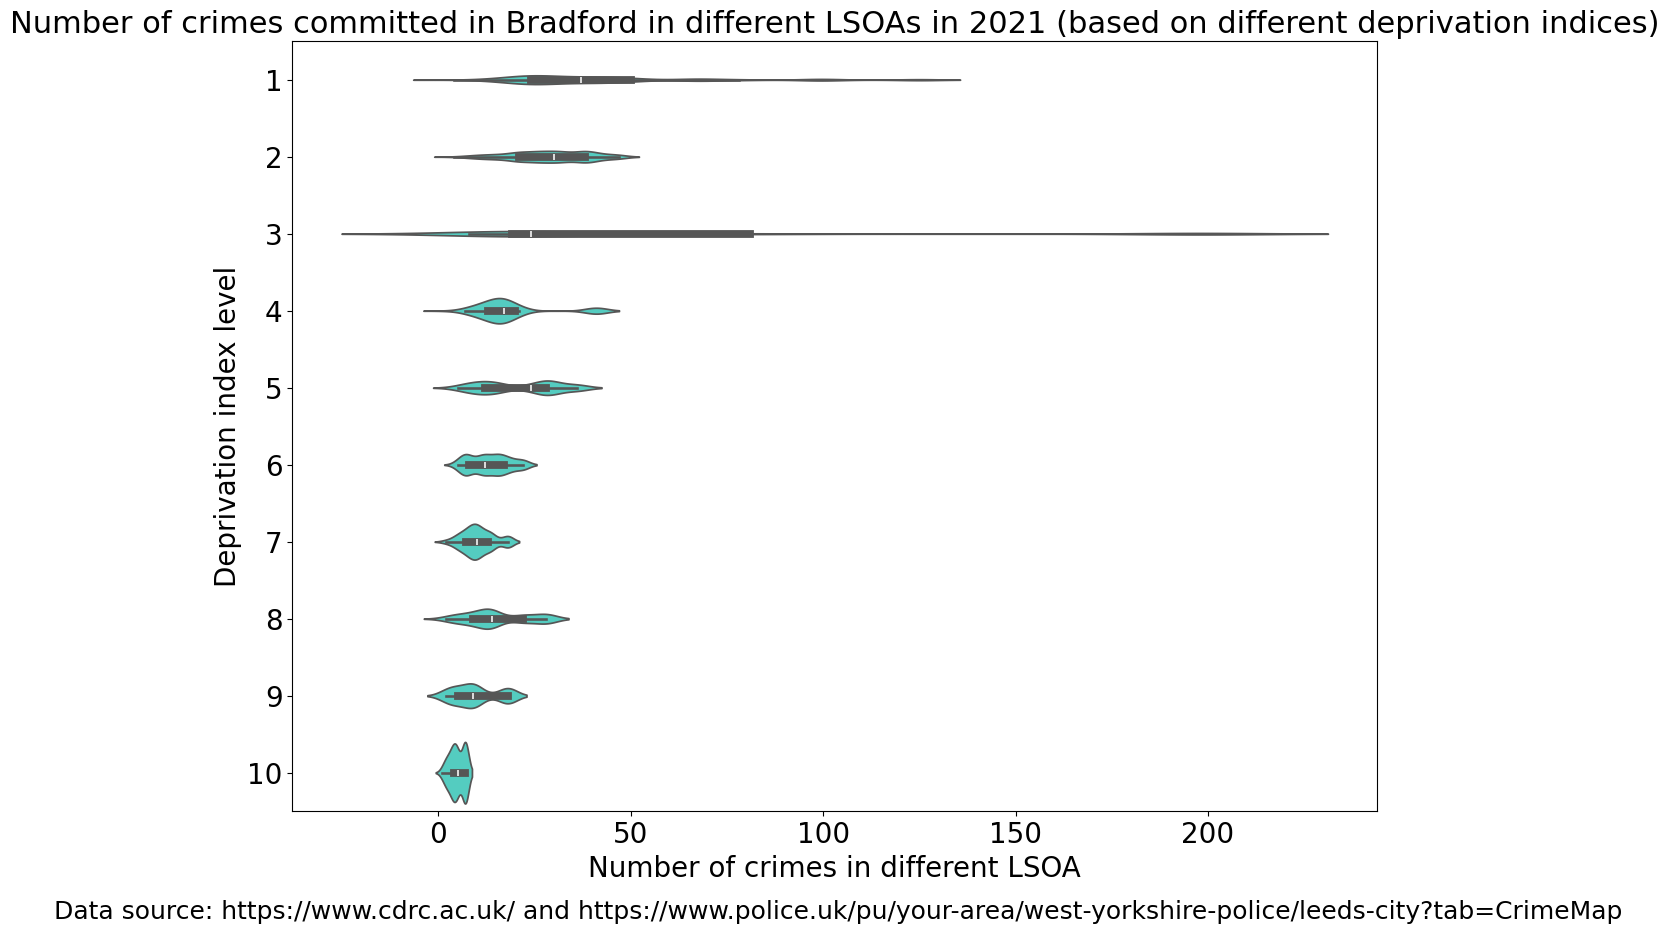

In [331]:
# Define plot size
plt.figure(figsize=(14,10))
# Plot a violinplot
sns.violinplot(x='Counts', y='Deprivation', data=Bradford_lsoa_counts, color='turquoise', orient="h")
# Add a title
plt.title('Number of crimes committed in Bradford in different LSOAs in 2021 (based on different deprivation indices)', fontsize=22)
# Add labels
plt.xlabel('Number of crimes in different LSOA',fontsize=20)
plt.ylabel('Deprivation index level', fontsize=20)
# Change tick value font size
plt.tick_params(labelsize=20)
# Add data source
plt.text(-100, 10.9, "Data source: https://www.cdrc.ac.uk/ and https://www.police.uk/pu/your-area/west-yorkshire-police/leeds-city?tab=CrimeMap",
fontsize=18, color="black");

In [332]:
# Load the Bradford terrain file and name it ‘Bradford_shp’
Bradford_shp =gpd.read_file('ew_lsoa_2021.geojson')

In [333]:
# View coordinate system information
Bradford_shp.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [334]:
# View the first five rows of 'Bradford_shp' dataframe set
Bradford_shp.head()

,lsoa21cd,lsoa21nm,label,name,geometry
0,E01010589,Bradford 022D,K04000001E92000001E12000003E08000032E02002204E...,Bradford 022D,"POLYGON ((408736.36800 436925.46450, 408739.19..."
1,E01010796,Bradford 043C,K04000001E92000001E12000003E08000032E02002225E...,Bradford 043C,"POLYGON ((410930.62500 433033.47400, 410933.87..."
2,E01010578,Bradford 015A,K04000001E92000001E12000003E08000032E02002197E...,Bradford 015A,"POLYGON ((410322.89100 440248.08500, 410325.82..."
3,E01010605,Bradford 024C,K04000001E92000001E12000003E08000032E02002206E...,Bradford 024C,"POLYGON ((417261.15000 436415.28500, 417261.56..."
4,E01010859,Bradford 012E,K04000001E92000001E12000003E08000032E02002194E...,Bradford 012E,"POLYGON ((404526.18650 440276.31750, 404531.09..."


In [335]:
# Check if there are null values in the 'Bradford_shp' dataframe set
Bradford_shp.isnull(). sum()

lsoa21cd    0
lsoa21nm    0
label       0
name        0
geometry    0
dtype: int64

In [336]:
# Join the 'Bradford_lsoa_counts' dataframe with the 'Bradford_shp' dataframe and name the new dataframe 'Bradford_Crime_Deprivation_total'
Bradford_Crime_Deprivation_total =Bradford_shp.merge(Bradford_lsoa_counts, how='left',left_on='lsoa21cd',right_on='LSOA')

In [337]:
# View the first five rows of 'Bradford_Crime_Deprivation_total' dataframe set
Bradford_Crime_Deprivation_total.head()

,lsoa21cd,lsoa21nm,label,name,geometry,Month,Longitude,Latitude,Location,LSOA,LSOA name,Crime type,LANAME,Rank,SOA_pct,Deprivation,Counts
0,E01010589,Bradford 022D,K04000001E92000001E12000003E08000032E02002204E...,Bradford 022D,"POLYGON ((408736.36800 436925.46450, 408739.19...",2021-04,-1.861814,53.824061,On or near Spring Farm Mews,E01010589,Bradford 022D,Anti-social behaviour,Bradford,27895.0,85.0,9.0,2.0
1,E01010589,Bradford 022D,K04000001E92000001E12000003E08000032E02002204E...,Bradford 022D,"POLYGON ((408736.36800 436925.46450, 408739.19...",2021-04,-1.864935,53.826644,On or near Bartle Court,E01010589,Bradford 022D,Burglary,Bradford,27895.0,85.0,9.0,2.0
2,E01010796,Bradford 043C,K04000001E92000001E12000003E08000032E02002225E...,Bradford 043C,"POLYGON ((410930.62500 433033.47400, 410933.87...",2021-04,-1.848444,53.790781,On or near Commercial Street,E01010796,Bradford 043C,Criminal damage and arson,Bradford,5816.0,18.0,2.0,8.0
3,E01010796,Bradford 043C,K04000001E92000001E12000003E08000032E02002225E...,Bradford 043C,"POLYGON ((410930.62500 433033.47400, 410933.87...",2021-04,-1.844195,53.790667,On or near Bronte Place,E01010796,Bradford 043C,Public order,Bradford,5816.0,18.0,2.0,8.0
4,E01010796,Bradford 043C,K04000001E92000001E12000003E08000032E02002225E...,Bradford 043C,"POLYGON ((410930.62500 433033.47400, 410933.87...",2021-04,-1.861687,53.775023,On or near Weavers Court,E01010796,Bradford 043C,Vehicle crime,Bradford,5816.0,18.0,2.0,8.0


In [338]:
# Delete useless variables in the ‘Bradford_Crime_Deprivation_total’ dataframe and simplify the dataframe.
Bradford_Crime_Deprivation_total.drop(columns=["lsoa21cd","lsoa21nm","label","name","Month",
"Location","LSOA name","Crime type","LANAME","Rank","SOA_pct"],inplace=True)

In [339]:
# Look at the first five rows of the "Bradford_Crime_Deprivation_total" dataframe set again
Bradford_Crime_Deprivation_total.head()

,geometry,Longitude,Latitude,LSOA,Deprivation,Counts
0,"POLYGON ((408736.36800 436925.46450, 408739.19...",-1.861814,53.824061,E01010589,9.0,2.0
1,"POLYGON ((408736.36800 436925.46450, 408739.19...",-1.864935,53.826644,E01010589,9.0,2.0
2,"POLYGON ((410930.62500 433033.47400, 410933.87...",-1.848444,53.790781,E01010796,2.0,8.0
3,"POLYGON ((410930.62500 433033.47400, 410933.87...",-1.844195,53.790667,E01010796,2.0,8.0
4,"POLYGON ((410930.62500 433033.47400, 410933.87...",-1.861687,53.775023,E01010796,2.0,8.0


In [340]:
# Check if there are null values in the 'Bradford_Crime_Deprivation_total' dataframe set
Bradford_Crime_Deprivation_total.isnull().sum()

geometry       0
Longitude      6
Latitude       6
LSOA           6
Deprivation    6
Counts         6
dtype: int64

In [341]:
# Remove null values in 'Bradford_Crime_Deprivation_total' dataframe
Bradford_Crime_Deprivation_total=Bradford_Crime_Deprivation_total.dropna()

In [342]:
# Recheck the ‘Bradford_Crime_Deprivation_total’ dataframe to see if there are any null values
Bradford_Crime_Deprivation_total.isnull().sum()

geometry       0
Longitude      0
Latitude       0
LSOA           0
Deprivation    0
Counts         0
dtype: int64

In [343]:
# Accurately view the variables of the ‘Bradford_Crime_Deprivation_total’ dataframe
Bradford_Crime_Deprivation_total.columns

Index(['geometry', 'Longitude', 'Latitude', 'LSOA', 'Deprivation', 'Counts'], dtype='object')

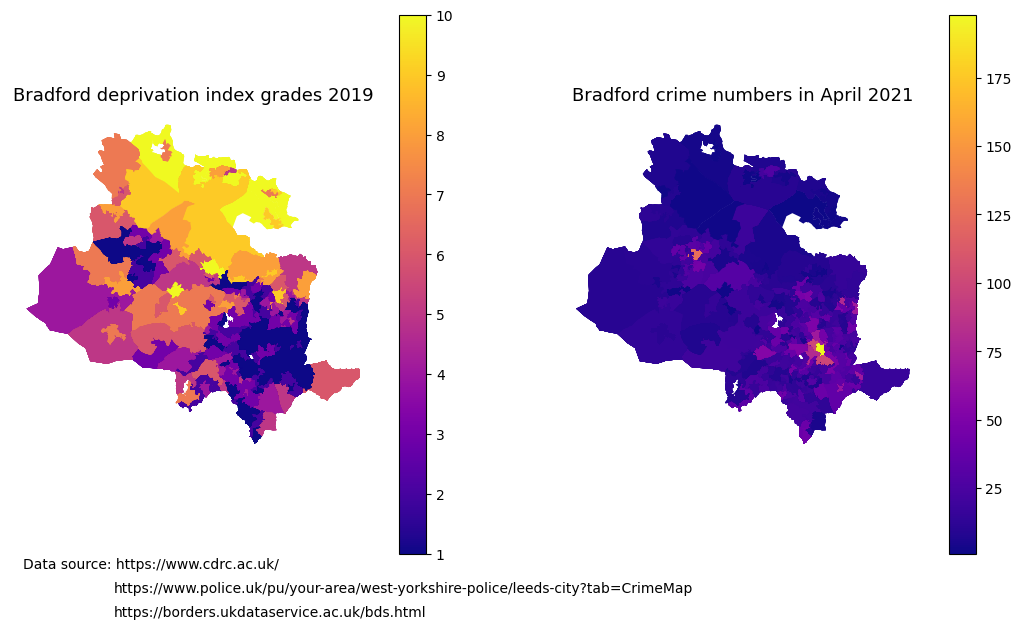

In [344]:
# Create a figure with two subplots (maps)
f,ax = plt.subplots(1,2, figsize=(13,7))
# Plot deprivation estimate in subplot 1
Bradford_Crime_Deprivation_total.plot(ax=ax[0], column ='Deprivation', cmap="plasma", legend=True, aspect=1)
# Plot crimecounts estimate in subplot 2
Bradford_Crime_Deprivation_total.plot(ax=ax[1], column ='Counts', cmap="plasma", legend=True, aspect=1)
# Give subplot 1 an informative title
ax[0].set_title('Bradford deprivation index grades 2019', fontsize='13')
# Give subplot 2 an informative title
ax[1].set_title('Bradford crime numbers in April 2021', fontsize='13')
# Make axis invisible for subplot 1
ax[0].set_axis_off()
# Make axis invisible for subplot 2
ax[1].set_axis_off()
# Add data source
plt.text(x=350000, y=415000, s='Data source: https://www.cdrc.ac.uk/')
plt.text(x=357550, y=413000, s='https://www.police.uk/pu/your-area/west-yorkshire-police/leeds-city?tab=CrimeMap')
plt.text(x=357550, y=411000, s='https://borders.ukdataservice.ac.uk/bds.html')
# Show figure
plt.show()

The subject of this study is the relationship between the number of crimes occurring in different areas of Bradford in April 2021 and the deprivation index (deciles) of the area. and providing specific crime data visualizations to local people through research. It is hoped that people can be more vigilant in areas with higher crime rates to protect people's property and personal safety.

First, download the required installation package before editing the code. Special note here: For Google users to use the geoplot installation package, they need to run the '!pip install geoplot' code.

During the data cleaning stage, the data was filtered as I was only looking at crime and poverty index data for the Bradford area. Use the 'df (new) = df[df["Column name where the specified data is filtered"].str.contains("Filtered data",na=False)]' function to apply it to the process of filtering data. Second, because the original data set has many variables that are not needed in the study, the two data frames need to be merged (they need to have the same variables). Therefore, unnecessary variables in the original data frame are reduced and variable names are renamed. Then use the 'merge' function to merge different data frames. Use the 'drop' and 'rename' functions to delete variable columns and rename variable names. Because the existence of null values has a strong impact on research, if null values are not deleted, many redundant and meaningless results will be run. So use isnull().sum() function to check if there are null values in the data frame and if so then use the dropna() function to remove the null values. Finally, use the head() and dtypes() functions to check whether the variable names and types required to merge the two datasets are consistent. Last but not least, using the describe() function it can be seen that the average deprivation index of the study area is 3.6. (All data cleaning results are reflected in the Notebook)

For non-spatial visualization, Spearman rank correlation was first used to quantify the association between two variables. The understanding of using Spearman rank correlation to quantify the relationship between variables is as follows: This is a measure of the relationship between two variables or multiple variables(Zhang, 2015). It is more suitable for analyzing two columns of variables and is very suitable for analyzing regardless of research. Whether the data is continuous or discrete, the applicability is very wide. The Spearman rank coefficient measures the correlation between two variables by comparing their ranks to measure the degree of association between them. Specifically, the value of the Spearman result coefficient ranges from -1 to 1, where -1 indicates a perfect negative correlation between the two variables, 1 indicates a perfect positive correlation, and 0 indicates that there is no linear correlation between the two variables. sex. Therefore, the Spearman model was chosen to quantify the correlation between the number of crimes and the deprivation index in different LSOAs. The most important reasons for selection are: that two variables can also be studied, fewer variables need to be analyzed and the requirements for data conditions are not strict.

Secondly, a violin plot is used to present non-spatial visualization, which combines the characteristics of box plots and kernel density plots while showing the distribution of data in different categories or groups. The reasons for choosing violin plots for visual research are as follows: Compared with traditional box plots, they can reflect information such as the median and interquartile range. The overall distribution of the data can also be shown. Displays more details of the data for analysis. Because I am studying the relationship between the deprivation index (deciles) and the numerical variable of crime, a violin plot is more appropriate.

Finally, for spatial visualization, since we want to study the association between the number of crimes and the deprivation index in different LSOA, it is more convenient to use a spatial database to plot the two subsets and present them side by side for comparison. This method can reflect the relationship between two variables in different regions. The optimal aspect of sub-graph selection: multiple graphs can be placed in the same chart for better analysis; at the same time, the spatial visualization graph is more beautiful and intuitive. To study the relationship between the number of crimes and the deprivation index in different LSOAs, it is more convenient to analyze the correlation between the two variables by observing the range of the number of crimes and the range of the deprivation index in different areas. If you try to use one graph for analysis, it may make it difficult to distinguish between the two types of data and the audience will not be able to understand and read it well. It may also reduce the aesthetics of the visualization. Because the audience of this study is local people, including special groups, drawing two sub-graphs can better and more clearly show it to all groups.

In non-spatial visualizations, change the plot orientation to landscape and change the fill color. Add a title: 'Number of crimes committed in Bradford in different LSOAs in 2021 (based on different deprivation indices'. Add tags: 'Number of crimes in different LSOAs', 'Deprivation index level'. And add data source text. Finally, adjust to fit the font size and position. In the spatial visualization, change the default colors. Add appropriate titles to the two graphs: 'Bradford deprivation index grades 2019', and 'Bradford crime numbers in April 2021' Add a data source to hide the axis and adjust the font size. and location.

To sum up, it can be seen from the violin plot that there are some outliers in deprivation index 1 and 3. The 'Upper Adjacent Value' of deprivation index 3 is the highest, and the 'Upper Adjacent Value' of deprivation index 10 is the lowest. The number of crimes fluctuates between 4 and 10 in the deprivation index. However, the number of crimes in different areas of Bradford generally shows a downward trend as the deprivation index increases from 1 to 10. This shows that there is a negative correlation between the number of crimes and the deprivation index in different areas of Bradford in April 2021. At the same time, it can also be seen from the Spearman rank correlation quantification table that the correlation between the number of crimes occurring in different areas and the deprivation index is -0.48223. So these two results can mutually prove the relationship between these two variables.

The spatial visualization map shows that the deprivation index is higher in the southeastern area of Bradford and that it is also higher in the northwest near the border. The deprivation index is lower in the northern region. The overall trend of the deprivation index is that it gradually decreases from north to south and gradually increases from east to west. At the same time, it can be seen that in April 2021, the southeastern area of Bradford had the highest number of crimes, and the northwest border area had a large number of crimes. The amount of crime in the northern region is very low. The overall trend in the number of crimes shows a general decreasing trend from the northwest region and the southeast region as two radiating centers.

Analyzing the results of all visualizations, it can be seen that there is a certain relationship between the number of crimes and the deprivation index in Bradford. In more detail, areas in Bradford that are very poor and have low levels of deprivation have overall higher levels of crime. In wealthier areas with higher deprivation indices, fewer crimes occur overall.

Therefore, through this study, for the property safety, personal safety, and family safety of local people. If you live in a place with a low deprivation index, try to go out as little as possible at night, go out in groups, and try to avoid areas with low human traffic and underdeveloped lighting systems. May reduce your risk of committing a crime. People who live in areas with a higher deprivation index can avoid frequent visits to areas with a lower deprivation index, fundamentally reducing their risk of crime.

The data sources used in this study are: https://www.cdrc.ac.uk/, https://www.police.uk/pu/your-area/west-yorkshire-police/leeds-city?tab =CrimeMap, https://borders.ukdataservice.ac.uk/bds.html

There is something to note about the selection of data: the earliest crime data time can be downloaded from the website 'https://www.police.uk/pu/your-area/west-yorkshire-police/leeds-city?tab=CrimeMap' It's April 2021. The deprivation index was last updated in 2019 and is updated every four years. Therefore, the 2019 deprivation index data can be applied to this study.

Reference:
Zhang, W. 2015. General correlation and partial correlation analysis in finding interactions: with Spearman rank correlation and proportion correlation as correlation measures. Network Biology, 5(4), p.163.